# NOTEBOOK_NAME002：数据预处理(零均值化、Z分数变换、最小最大规范化)

数据使用经典的机场旅客流量数据集

学习笔记：大数据分析与挖掘

刘文翰 2018/11/24

------------------------------------------------------------------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
import warnings 
warnings.filterwarnings('ignore')
#rcParams设定好画布的大小
# rcParams['figure.figsize'] = (15, 6)
df = pd.read_excel('G://LWH-DataSet//AirPassengers.xlsx', index_col='Month')
ts = df['#Passengers']

# 数据变换、离散化与编码

## 1.零均值化
作用：**消除直流分量的干扰**，数据曲线形状没有发生变化，两个属性的方差也没有改变

公式：$x'=x-mean(x) $

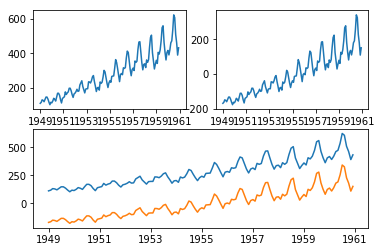

In [2]:
def ZeroMeanPlot(series): #零均值化画图
    plt.subplot(2,2,1)
    plt.plot(series)
    plt.subplot(2,2,2)
    temp = series - np.mean(series)
    plt.plot(temp)
    plt.subplot(2,1,2)
    plt.plot(series)
    plt.plot(temp)
    plt.show()
ZeroMeanPlot(ts)

## 2.Z分数变换（标准分数）
公式：$z=\frac{x-mean(x)}{s}$，s:样本标准差  mean(x):样本均值

z值表示原始数据和样本之间的距离，是以标准差为单位计算的。在原始数据低于平均值时z为负数，反之则为正数

**缺点**：假如原始数据并没有满足高斯分布，标准化的数据分布效果并不好

In [3]:
# 检验高斯分布
from scipy import stats
stats.normaltest (ts.values, axis=0)
# pvalue>0.05则为高斯分布假设成立

NormaltestResult(statistic=8.6553620048138136, pvalue=0.013198118434288969)

280.298611111
0.840181568558


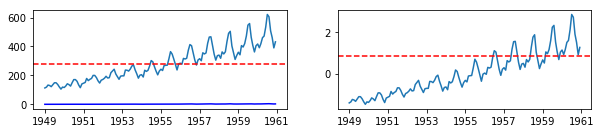

In [4]:
def Z_score_plot(series):
    z = (series - np.mean(series))/np.std(series)
    plt.figure(figsize=(10,4))
    plt.subplot(2,2,1)
    plt.plot(series)
    plt.plot(z, color='b', linewidth=1.5)
    plt.axhline(np.mean(abs(series)), color='r',linestyle='--')
    print(np.mean(abs(series)))
    plt.subplot(2,2,2)
    plt.plot(z)
    plt.axhline(np.mean(abs(z)), color='r',linestyle='--') #添置基准线
    print(np.mean(abs(z)))
    plt.show()
Z_score_plot(ts)

## 3.最小-最大规范化（离差标准化）
是对原始数据的线性转化，将数据按比例缩放至一个特定区间。

当多个属性的数值分布区间相差较大时，使用最小-最大规范化可以将这些属性值变换到同一个区间。

公式：$v'=min'+\frac{v-min}{max-min}(max'-min')$

原始序列：方差:14291.973331404319,均值:280.2986111111111
放大变换后序列：方差:0.053263865071347775,均值:0.34034480909480913


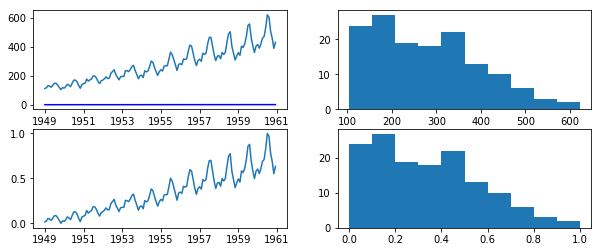

In [5]:
def Min_Max_Normalization_plot(series,c_max, c_min):
    v = c_min + (series - series.min())/(series.max() - series.min())*(c_max-c_min)
    plt.figure(figsize=(10,4))
    plt.subplot(2,2,1)
    plt.plot(series)
    plt.plot(v,color='b', linewidth=1.5)
    plt.subplot(2,2,2)
    plt.hist(series)
    plt.subplot(2,2,3)
    plt.plot(v)
    plt.subplot(2,2,4)
    plt.hist(v)
    print('原始序列：方差:{},均值:{}'.format(np.var(series),np.mean(series)))  # np.var()方差
    print('放大变换后序列：方差:{},均值:{}'.format(np.var(v),np.mean(v)))  # np.var()方差
Min_Max_Normalization_plot(ts, 1, 0)

等比例放大后，形状没有发生改变，只是对其做线性变换，方差和均值都会改变，但数据分布形态不变